In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import random

%matplotlib inline

# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *Your group letter.*

**Names:**

* *Name 1*
* *Name 2*
* *Name 3*

---

#### Instructions

*This is a template for part 2 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.2 Network sampling

#### Exercise 2.7: Random walk on the Facebook network

In [2]:
def crawl_API(user_id):
    # Base url of the API
    URL_TEMPLATE = 'http://iccluster118.iccluster.epfl.ch:5050/v1.0/facebook?user={user_id}'
    # The actual url to call 
    url = URL_TEMPLATE.format(user_id=user_id)
    # Execute the HTTP Get request
    response = requests.get(url)
    # Format the json response as a Python dict
    data = response.json()
    
    return data

In [3]:
crawl_API('123')

{u'error': u'Not found'}

In [4]:
def random_walker(source_node, No_of_nodes):
    ages = []
    degrees = []
    current_node = source_node
    i=0
    while i < No_of_nodes:
        ages.append(current_node['age'])
        friends = current_node['friends']
        degrees.append(len(friends))
        
        while True:
            neighbor = crawl_API( str(random.choice(friends)) )
            if 'error' not in neighbor:
                break
        
        current_node = neighbor
        i += 1
    return ages, degrees

In [5]:
source_node = crawl_API('f30ff3966f16ed62f5165a229a19b319')

In [6]:
facebook_ages, facebook_degrees = random_walker(source_node, 1000)

In [7]:
np.mean(facebook_ages)

22.971

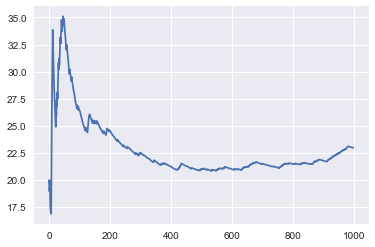

In [8]:
mean_distro = []
ages= []

for i, age in enumerate(facebook_ages):
    ages.append(age)
    
    mean_distro.append(np.mean(ages))

plt.plot(mean_distro)
plt.show()

#### Exercise 2.8

In [9]:
def unbiased_estimate(ages, degrees):
    
    num = sum(ages / degrees)
    denum = sum(np.ones(len(degrees)) / degrees)
    
    return num / denum

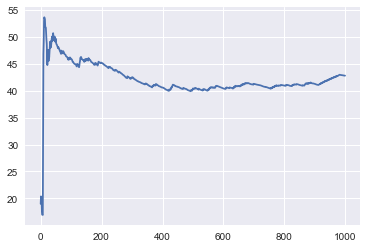

In [10]:
mean_unbiased_distro = []
ages = np.array([])
degrees = np.array([])

for i, age in enumerate(facebook_ages):
    ages = np.append(ages, age)
    degrees = np.append(degrees, facebook_degrees[i])
    
    mean_unbiased_distro.append( unbiased_estimate(ages, degrees) )


plt.plot(mean_unbiased_distro)
plt.show()

In [11]:
mean_unbiased_distro[-1]

42.800866130988688